In [145]:
import pandas as pd
import math
import seaborn as sns
data = pd.read_csv('./train.csv')

In [146]:
df1 = data.copy()
df1.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

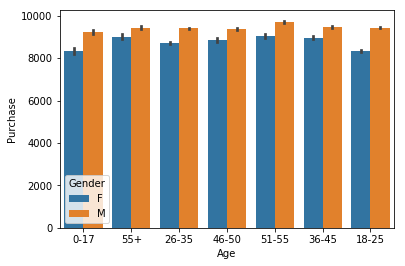

In [131]:
#Let's take a look at purchase behavior for each age group and gender
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df1)

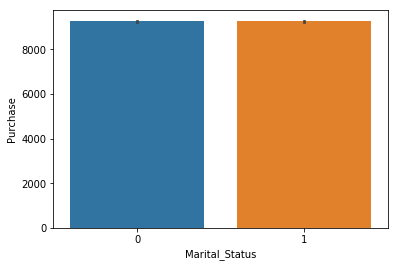

In [132]:
#Seems like male of every age shop more than female on black friday

#Let's now look at the effect of Marital_Status
sns.barplot(x='Marital_Status',y='Purchase',data=df2)

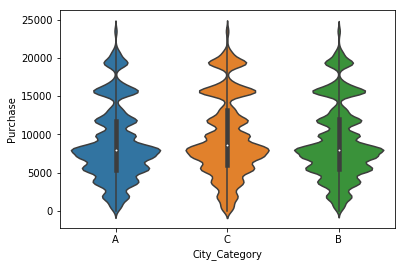

In [133]:
#Seems like almost irrelevant

#What about the city category?
sns.violinplot(x='City_Category',y='Purchase',data=df1)

In [134]:
#City C may be a higher end store with higher purchase items

In [147]:
#Now some feature Engineering
#How many distinct User_ID are there?
distinct_users = df1.groupby('User_ID')['Product_ID'].count().sort_values(ascending=False)
len(distinct_users)

5891

In [148]:
#What proportion is the largest one
distinct_users.max()/df1.size

0.00015543532799581144

In [149]:
#What about Product_ID?
distinct_products = df1.groupby('Product_ID')['User_ID'].count().sort_values(ascending=False)
distinct_products.max()/df1.size

0.0002848132715712724

In [150]:
#Because of low proportion of distinct User_ID and Product_ID and 
#complexity in encoding them for model fitting, we will drop these two columns
df1 = df1.drop(columns=['User_ID','Product_ID'])

In [151]:
#Which variables are categorical?
for col in df1.columns:
    print(col + ': ' + str(df1[col].unique()))

Gender: ['F' 'M']
Age: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Occupation: [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
City_Category: ['A' 'C' 'B']
Stay_In_Current_City_Years: ['2' '4+' '3' '1' '0']
Marital_Status: [0 1]
Product_Category_1: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Product_Category_2: [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Product_Category_3: [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]
Purchase: [ 8370 15200  1422 ...   135   123   613]


In [152]:
#I will only exclude Stay_In_Current_City_Years from being 
#categorical since the effect of stay is ordered

#Will use get_dummies to one-hot encode the columns
df1 = pd.get_dummies(df1, columns=['Age','Occupation','City_Category'])
df1.columns

Index(['Gender', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase', 'Age_0-17', 'Age_18-25', 'Age_26-35', 'Age_36-45',
       'Age_46-50', 'Age_51-55', 'Age_55+', 'Occupation_0', 'Occupation_1',
       'Occupation_2', 'Occupation_3', 'Occupation_4', 'Occupation_5',
       'Occupation_6', 'Occupation_7', 'Occupation_8', 'Occupation_9',
       'Occupation_10', 'Occupation_11', 'Occupation_12', 'Occupation_13',
       'Occupation_14', 'Occupation_15', 'Occupation_16', 'Occupation_17',
       'Occupation_18', 'Occupation_19', 'Occupation_20', 'City_Category_A',
       'City_Category_B', 'City_Category_C'],
      dtype='object')

In [153]:
#For the case of Product_Categories, I will one-hot encode one of them and then 
#map the values of the other product categories on top
df1 = pd.get_dummies(df1, columns=['Product_Category_1'])

pc2 = df1['Product_Category_2']
pc3 = df1['Product_Category_3']
for i in range(1,21):
    ProductString = 'Product_Category_1_' + str(i)
    df1.loc[:,ProductString] = df1.loc[:,ProductString] + (pc2 == i).map({False: 0, True: 1})
    df1.loc[:,ProductString] = df1.loc[:,ProductString] + (pc3 == i).map({False: 0, True: 1})

#Now removing Product_Category_2 and 3
df2 = df1.copy()
df2 = df2.drop(columns=['Product_Category_2','Product_Category_3'])

df2.head()

,Gender,Stay_In_Current_City_Years,Marital_Status,Purchase,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,...,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20
0,F,2,0,8370,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,F,2,0,15200,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,F,2,0,1422,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,F,2,0,1057,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,M,4+,0,7969,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
#Now encode Stay_In_Current_City_Years as numerical 0-4, will keep 4+ as 4
df2['Stay_In_Current_City_Years'] = df2['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4})
df2['Gender'] = df2['Gender'].map({'M': 0, 'F': 1})

In [155]:
#Lets look if there are any correlations we can pick up
df2_corr = df2.corr()['Purchase']
df2_corr[abs(df2_corr) > 0.5].sort_values()

Product_Category_1_1    0.506021
Purchase                1.000000
Name: Purchase, dtype: float64

In [156]:
#Product_Category1 seems to be quite pricey as it is the only highly 
#correlated item with purchase price (i.e. if bought then price high, else price low)

In [157]:
#Time to train a model with what we got
X = df2.drop(columns=['Purchase'])
y = df2['Purchase']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.01,random_state=0)

In [163]:
#As a baseline, lets assume mean of training set
(abs(y_test - y_train.mean())).mean()

4096.4788341165195

In [172]:
#Lets start with a multilinear regression
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(fit_intercept=False, normalize=True)
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [173]:
#lets take a look at the predicted coefficients
linear_model.coef_

array([ 8.14769670e+00,  4.12434283e+00, -5.63362617e+01,  2.15111802e+13,
        2.15111802e+13,  2.15111802e+13,  2.15111802e+13,  2.15111802e+13,
        2.15111802e+13,  2.15111802e+13,  1.48164330e+14,  1.48164330e+14,
        1.48164330e+14,  1.48164330e+14,  1.48164330e+14,  1.48164330e+14,
        1.48164330e+14,  1.48164330e+14,  1.48164330e+14,  1.48164330e+14,
        1.48164330e+14,  1.48164330e+14,  1.48164330e+14,  1.48164330e+14,
        1.48164330e+14,  1.48164330e+14,  1.48164330e+14,  1.48164330e+14,
        1.48164330e+14,  1.48164330e+14,  1.48164330e+14, -1.69675510e+14,
       -1.69675510e+14, -1.69675510e+14,  4.41917383e+03,  1.98074170e+03,
        3.73023242e+03, -1.55391016e+03, -1.39938330e+03,  3.77138916e+03,
        7.38680884e+03,  1.12800781e+02, -1.67690430e+01,  7.92569470e+03,
       -2.18040771e+03, -1.43652686e+03, -2.61326294e+03, -3.22914062e+02,
        4.93083496e+02,  1.42187695e+03,  1.24039697e+03, -7.85487061e+02,
       -7.95438144e+03, -

In [174]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred_linear)

2722.405727717253

In [181]:
import numpy as np
from sklearn.grid_search import GridSearchCV
param_grid = {'fit_intercept': [True, False], 'normalize': [True, False]}
grid = GridSearchCV(LinearRegression(), param_grid, cv=7)

In [182]:
grid.fit(X_train, y_train)

GridSearchCV(cv=7, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [183]:
cv_linear_model = grid.best_estimator_
y_pred_cv_linear = cv_linear_model.predict(X_test)
mean_absolute_error(y_test, y_pred_cv_linear)

2722.391928740229

In [7]:
#Now some more sophisticated xgboost
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=500, learning_rate=0.1)
my_model.fit(X_train, y_train)

KeyboardInterrupt: 

In [84]:
y_pred = my_model.predict(X_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

2501.6337280273438